In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib.pyplot as plt
plt.ion()
from cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# load shape space
with open(r'D:/Dropbox/CavityDesignHub/MuCol_Study/Cavities/cavity_data_mid_end_cells.json') as f:
    shape_space = json.load(f)
pp.pprint(shape_space)

{   'C3795_1300MHz': {   'BP': 'both',
                         'FREQ': 1300,
                         'IC': [   38.23,
                                   35.76,
                                   10.48,
                                   7.4,
                                   49.94,
                                   57.7,
                                   105.66,
                                   113.76249257990644],
                         'OC': [   38.23,
                                   35.76,
                                   10.48,
                                   7.4,
                                   49.94,
                                   57.7,
                                   105.66,
                                   113.76249257990644],
                         'OC_R': [   38.23,
                                     35.76,
                                     10.48,
                                     7.4,
                                     49.94,
        

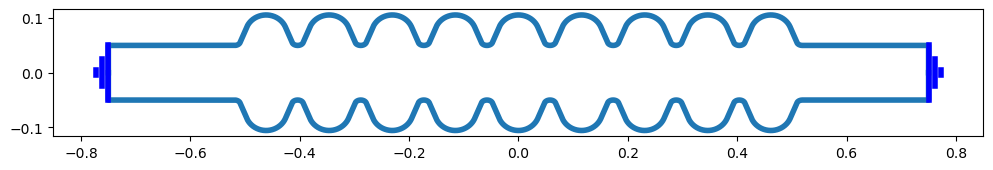

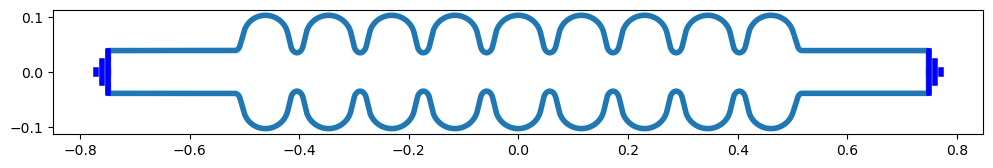

In [3]:
# define geometry parameters
# midcell = np.array([42, 42, 12, 19, 35, 57.7, 103.353])
# endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
# endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])

C3795_1300MHz = shape_space['C3795_1300MHz']
TESLA = shape_space['TESLA']

# create cavity
cav = Cavity(9, np.array(C3795_1300MHz['IC']), np.array(C3795_1300MHz['OC']), np.array(C3795_1300MHz['OC_R']), beampipe='both')
ax = cav.plot('geometry')

# create cavity
cav1 = Cavity(9, np.array(TESLA['IC']), np.array(TESLA['OC']), np.array(TESLA['OC_R']), beampipe='both')
# show cavity
cav1.plot('geometry', ax)

# Create cavities object

In [4]:
help(Cavities)

Help on class Cavities in module cavity:

class Cavities(builtins.object)
 |  Cavities(cavities_list=None, names_list=None, save_folder='None')
 |  
 |  Cavities object is an object containing several Cavity objects.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, cavities_list=None, names_list=None, save_folder='None')
 |      Constructs all the necessary attributes of the Cavity object
 |      
 |      Parameters
 |      ----------
 |      cavities_list: list, array like
 |          List containing Cavity objects.
 |      
 |      save_folder: str
 |          Folder to save generated images, latex, excel, and text files.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  add_cavity(self, cavs, names=None)
 |      Adds cavity to cavities
 |      Parameters
 |      ----------
 |      cav: Cavity
 |          Cavity object
 |      
 |      Returns
 |      -------
 |  
 |  compare_power(self, E_acc=None)
 |  
 |  make_excel_summary(self)
 |  
 |  make_latex_summary_tables(se

In [5]:
cavs = Cavities([])
# must first save cavities
cavs.save(files_path='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

('Project created successfully/already exists. You can proceed with analysis.',)


# Add cavity(ies)


In [6]:
cavs.add_cavity([cav, cav1], ['C3795_1300MHz', 'TESLA'])

# Tune cavities

In [7]:
help(cavs.run_tune)

Help on method run_tune in module cavity:

run_tune(tune_variables, cell_types='Mid Cell', freqs=None, solvers='SLANS', proc=0, resume=False, n_cells=1, rerun=True) method of cavity.Cavities instance
    Tune current cavity geometries
    
    Parameters
    ----------
    n_cells: int
        Number of cells used for tuning.
    resume: bool
        Option to resume tuning or not. Only for shape space with multiple entries.
    proc: int
        Processor number
    solver: {'SLANS', 'Native'}
        Solver to be used. Native solver is still under development. Results are not as accurate as that of SLANS.
    freqs: float, list, ndarray
        Reference frequency or list of reference frequencies if different for each cavity in MHz
    cell_types: {'mid cell', 'end-mid cell', 'mid-end cell', 'single cell'}
        Type of cell to tune or list of type of cell to tune for the different cavities
    tune_variables: {'Req', 'L'}
        Tune variable or list of tune variables. Currently 

In [8]:
cavs.run_tune('Req', freqs=1300, rerun=False)
pp.pprint(cavs.eigenmode_tune_res)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Done Tuning Cavity C3795_1300MHz: Success: (1300, 1300.0)
Processor 0 runtime: 11.669415950775146


  0%|          | 0/1 [00:00<?, ?it/s]

Done Tuning Cavity TESLA: Success: (1300, 1300.0)
Processor 0 runtime: 9.256469011306763
{   'C3795_1300MHz': {   'L': 57.7,
                         'Req': 108.94352117946221,
                         'alpha_i': 111.23373752785915,
                         'alpha_o': 111.23373752785915,
                         'freq': 1300.0},
    'TESLA': {   'L': 57.6524,
                 'Req': 103.35414205663352,
                 'alpha_i': 103.1698581885549,
                 'alpha_o': 103.1698581885549,
                 'freq': 1300.0}}


# Run eigenmode analysis

In [9]:
help(cavs.run_eigenmode)

Help on method run_eigenmode in module cavity:

run_eigenmode(solver='SLANS', freq_shifts=0, boundary_conds=None, subdir='', UQ=False, rerun=True) method of cavity.Cavities instance
    Run eigenmode analysis on cavity
    
    Parameters
    ----------
    solver: {'SLANS', 'NGSolve'}
        Solver to be used. Native solver is still under development. Results are not as accurate as that of SLANS.
    freq_shifts:
        (List of) frequency shift. Eigenmode solver searches for eigenfrequencies around this value
    boundary_conds: int, list
        (List of) boundary condition of left and right cell/beampipe ends
    subdir: str
        Sub directory to save results to
    UQ: bool
        Used to turn on or off uncertainty quantification
    
    Returns
    -------



In [10]:
cavs.run_eigenmode('ngsolve', rerun=False)
pp.pprint(cavs.eigenmode_qois)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

('Done with Cavity C3795_1300MHz. Time: 12.269337892532349',)


  0%|          | 0/1 [00:00<?, ?it/s]

('Done with Cavity TESLA. Time: 11.178086519241333',)
{   'C3795_1300MHz': {   'Bpk [mT]': 8.276355204329615e-05,
                         'Bpk/Eacc [mT/MV/m]': 7.2747011862063,
                         'Eacc [MV/m]': 1.1376900566063895e-05,
                         'Epk [MV/m]': 4.270822513903627e-05,
                         'Epk/Eacc []': 3.753942024107202,
                         'G [Ohm]': 281.28757420904304,
                         'GR/Q [Ohm^2]': 173038.49127247377,
                         'Hpk [A/m]': 0.06586114207766958,
                         'N Cells': 9,
                         'Normalization Length [mm]': 115.4,
                         'Q []': 30328.915731160254,
                         'R/Q [Ohm]': 615.1657845500051,
                         'Req [mm]': 108.94352117946221,
                         'Rsh [MOhm]': 18.657311240310186,
                         'Vacc [MV]': 1.181604892791396e-05,
                         'ff [%]': 1.2983794801174287,
                   

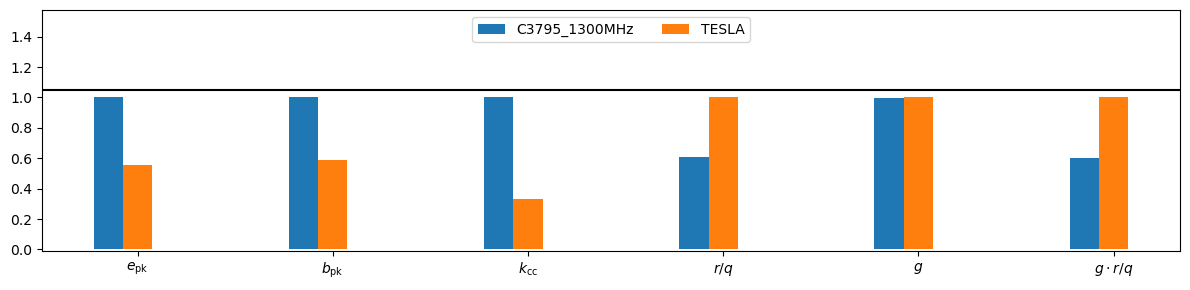

In [11]:
cavs.plot_compare_fm_bar()

# Run wakefield analysis

In [12]:
help(cavs.run_wakefield)

Help on method run_wakefield in module cavity:

run_wakefield(MROT=2, MT=10, NFS=10000, wakelength=50, bunch_length=25, DDR_SIG=0.1, DDZ_SIG=0.1, WG_M=None, marker='', wp_dict=None, solver='ABCI', rerun=True) method of cavity.Cavities instance
    Run wakefield analysis on cavity
    
    Parameters
    ----------
    MROT: {0, 1}
        Polarisation 0 for longitudinal polarization and 1 for transversal polarization
    MT: int
        Number of time steps it takes for a beam to move from one mesh cell to the other
    NFS: int
        Number of frequency samples
    wakelength:
        Wakelength to be analysed
    bunch_length: float
        Length of the bunch
    DDR_SIG: float
        Mesh to bunch length ration in the r axis
    DDZ_SIG: float
        Mesh to bunch length ration in the z axis
    WG_M:
        For module simulation. Specifies the length of the beampipe between two cavities.
    marker: str
        Marker for the cavities. Adds this to the cavity name specified i

In [13]:
# cavs.run_wakefield(bunch_length=50)

# Run wakefield for operating points

In [14]:
op_points = OperationPoints()
op_points.get_default_operation_points()
pp.pprint(op_points.op_points['W_2023'])
cavs.run_wakefield(wp_dict={'Z_2023': op_points.op_points['Z_2023'], 'W_2023': op_points.op_points['W_2023']}, rerun=False)

{   'E [GeV]': 80,
    'Eacc [MV/m]': 10.61,
    'I0 [mA]': 135,
    'N_c []': 132,
    'Nb [1e11]': 2.29,
    'T [K]': 4.5,
    'V [GV]': 1.0,
    'alpha_p [1e-5]': 2.85,
    'beta_xy [m]': 50,
    'f_rev [kHz]': 3.07,
    'freq [MHz]': 400.79,
    'nu_s []': 0.0801,
    'sigma_BS [mm]': 7.02,
    'sigma_SR [mm]': 3.55,
    'tau_xy [ms]': 131.98,
    'tau_z [ms]': 65.99}


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

('Cavity C3795_1300MHz. Time: 112.10047554969788',)


  0%|          | 0/2 [00:00<?, ?it/s]

('Running wakefield analysis for given operating points.',)
At least it got here
At least it got here
At least it got here
At least it got here
('Running wakefield analysis for given operating points.',)
At least it got here
At least it got here
At least it got here
At least it got here
('Done with the secondary analysis for working points',)


ic| self.folder: WindowsPath('D:/Dropbox/CavityDesignHub/MuCol_Study/SimulationData/ConsoleTest/cavities')


At least it got here
At least it got here


  0%|          | 0/2 [00:00<?, ?it/s]

('Cavity TESLA. Time: 112.3999433517456',)


  0%|          | 0/2 [00:00<?, ?it/s]

('Running wakefield analysis for given operating points.',)
At least it got here
At least it got here
At least it got here
At least it got here
('Running wakefield analysis for given operating points.',)
At least it got here
At least it got here


ic| self.folder: WindowsPath('D:/Dropbox/CavityDesignHub/MuCol_Study/SimulationData/ConsoleTest/cavities')


At least it got here
At least it got here
('Done with the secondary analysis for working points',)
At least it got here
At least it got here


In [15]:
pp.pprint(cavs.abci_qois)

{   'C3795_1300MHz': {   'W_2023_BS_7.02mm': {   'I0 [mA]': 135.0,
                                                 'Nb [1e11]': 2.29,
                                                 'P_HOM [kW]': 8.118014123654012,
                                                 'R/Q [Ohm]': 615.1657845500051,
                                                 'k_FM [V/pC]': 1.209852483713244,
                                                 'n cell': 9,
                                                 'sigma_z [mm]': 7.02,
                                                 '|k_kick| [V/pC/m]': 16.31,
                                                 '|k_loss| [V/pC]': 2.849},
                         'W_2023_SR_3.55mm': {   'I0 [mA]': 135.0,
                                                 'Nb [1e11]': 2.29,
                                                 'P_HOM [kW]': 12.529176605460064,
                                                 'R/Q [Ohm]': 615.1657845500051,
                                  

In [16]:
cavs.cavities_list[0].abci_data['Long'].data_dict.keys()

dict_keys(['Cavity Shape Input', 'Wake Potentials', 'Real Part of Longitudinal Impedance', 'Imaginary Part of Longitudinal Impedance', 'Frequency Spectrum of Loss Factor', 'Loss Factor Spectrum Integrated upto F', 'Longitudinal Impedance Magnitude'])

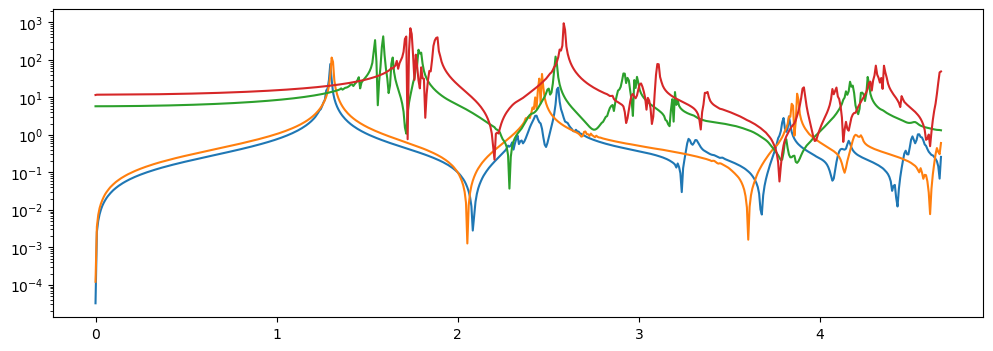

In [17]:
ax = cavs.plot('ZL')
cavs.plot('ZT', ax)
ax.set_yscale('log')

ic| results: [{'$P_\\mathrm{HOM}/cav \\mathrm{[kW]}$': 128.0978464248287,
               '$|k_\\parallel| \\mathrm{[V/pC]}$': 3.501,
               '$|k_\\perp| \\mathrm{[V/pC/m]}$': 13.24},
              {'$P_\\mathrm{HOM}/cav \\mathrm{[kW]}$': 198.5488539382584,
               '$|k_\\parallel| \\mathrm{[V/pC]}$': 5.548,
               '$|k_\\perp| \\mathrm{[V/pC/m]}$': 35.49}]


{   'W_2023_BS_7.02mm': {   'I0 [mA]': 135.0,
                            'Nb [1e11]': 2.29,
                            'P_HOM [kW]': 8.118014123654012,
                            'R/Q [Ohm]': 615.1657845500051,
                            'k_FM [V/pC]': 1.209852483713244,
                            'n cell': 9,
                            'sigma_z [mm]': 7.02,
                            '|k_kick| [V/pC/m]': 16.31,
                            '|k_loss| [V/pC]': 2.849},
    'W_2023_SR_3.55mm': {   'I0 [mA]': 135.0,
                            'Nb [1e11]': 2.29,
                            'P_HOM [kW]': 12.529176605460064,
                            'R/Q [Ohm]': 615.1657845500051,
                            'k_FM [V/pC]': 1.2431733205763418,
                            'n cell': 9,
                            'sigma_z [mm]': 3.55,
                            '|k_kick| [V/pC/m]': 12.13,
                            '|k_loss| [V/pC]': 3.773},
    'Z_2023_BS_15.2mm': {   'I0 [mA]': 128

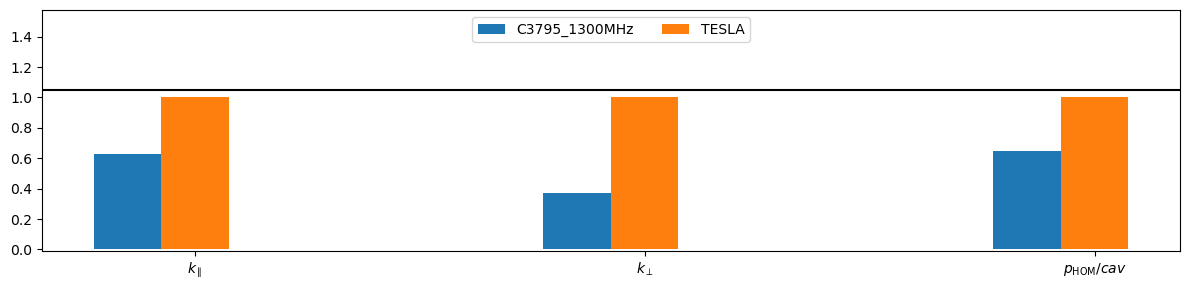

In [18]:
cav.get_abci_qois()
pp.pprint(cav.abci_qois)
cavs.plot_compare_hom_bar('Z_2023_SR_4.32mm')

ic| results: [{'$P_\\mathrm{HOM}/cav \\mathrm{[kW]}$': 40.44019869908093,
               '$|k_\\parallel| \\mathrm{[V/pC]}$': 1.772,
               '$|k_\\perp| \\mathrm{[V/pC/m]}$': 19.99},
              {'$P_\\mathrm{HOM}/cav \\mathrm{[kW]}$': 48.66729017024948,
               '$|k_\\parallel| \\mathrm{[V/pC]}$': 2.602,
               '$|k_\\perp| \\mathrm{[V/pC/m]}$': 48.14}]


<class 'numpy.ndarray'> <class 'int'> <class 'float'> <class 'numpy.ndarray'> [[ 1.772      19.99       40.4401987 ]
 [ 2.602      48.14       48.66729017]]
<class 'numpy.ndarray'> <class 'int'> <class 'float'> <class 'numpy.ndarray'> [[ 1.772      19.99       40.4401987 ]
 [ 2.602      48.14       48.66729017]]


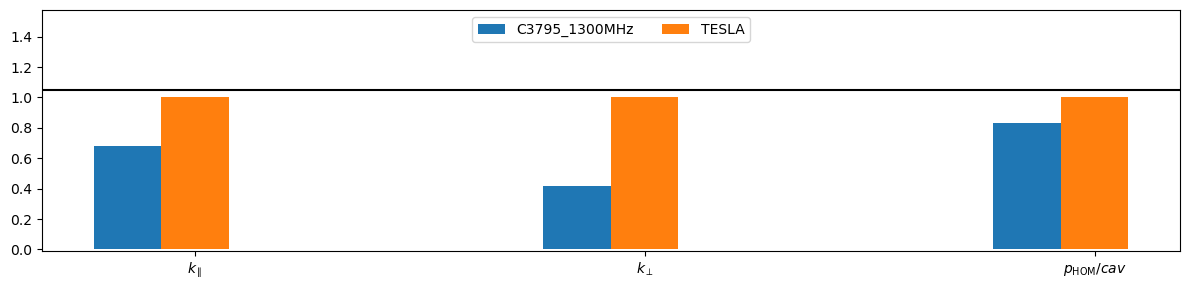

In [19]:

cavs.plot_compare_hom_bar('Z_2023_BS_15.2mm')